In [1]:
import numpy as np
from skimage import morphology as sk_mm
from matplotlib import pyplot as plt

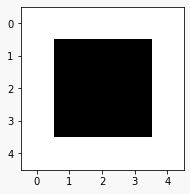

In [2]:
square = np.array([[0, 0, 0, 0, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 0, 0, 0, 0]], 
                  dtype=np.uint8)


# Display it
fig = plt.figure(figsize=(3,3))
plt.imshow(square, cmap="binary")
fig.patch.set_facecolor("#f8f8f8ff")
plt.show()

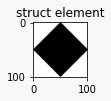

In [52]:
struct_element = sk_mm.selem.diamond(50)

# Display it
fig = plt.figure(figsize=(1,1))
a=fig.add_subplot(1, 1, 1)
a.set_title("Eroded")
plt.imshow(struct_element, cmap="binary")
fig.patch.set_facecolor("#f8f8f8ff")
a.set_title("struct element")
plt.show()

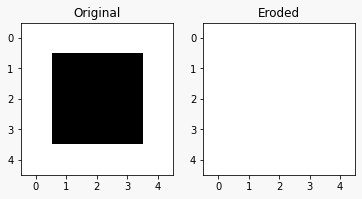

In [50]:
# Apply erosion
eroded_square = sk_mm.erosion(square, struct_element)

fig = plt.figure(figsize=(6, 6))
# Plot original image
a=fig.add_subplot(1, 2, 1)
plt.imshow(square, cmap="binary")
a.set_title("Original")

# Plot eroded image
a=fig.add_subplot(1, 2, 2)
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(eroded_square, cmap="binary")
a.set_title("Eroded")

plt.show()

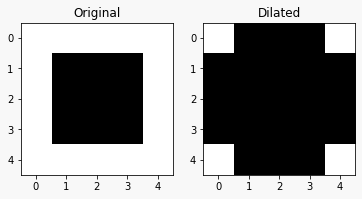

In [7]:
#Apply dilation
dilated_square = sk_mm.dilation(square, struct_element)

# Display it
fig = plt.figure(figsize=(6, 6))

# Plot original image
a=fig.add_subplot(1, 2, 1)
plt.imshow(square, cmap="binary")
a.set_title("Original")

# Plot dilated image
a=fig.add_subplot(1, 2, 2)
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(dilated_square, cmap="binary")
a.set_title("Dilated")

plt.show()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
image_file = "/content/drive/My Drive/CVData/plane.png"

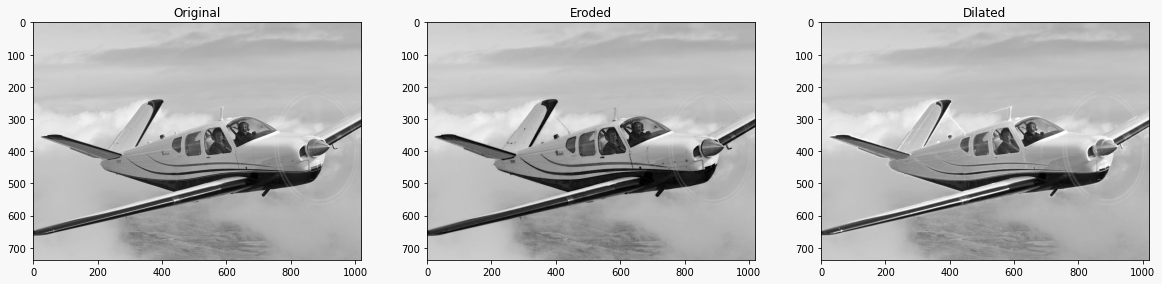

In [61]:
import os
from skimage import io as sk_io
import skimage.color as sk_col

# Load the image from the source file
image = sk_io.imread(image_file)

# Convert to grayscale so we only have one channel
bw_image = sk_col.rgb2gray(image)

# Apply operations
eroded_image = sk_mm.erosion(bw_image)
dilated_image = sk_mm.dilation(bw_image)
closed_image = sk_mm.closing(bw_image)
opened_image = sk_mm.opening(bw_image)

# Display it
fig = plt.figure(figsize=(20,20))

# Plot original image
a=fig.add_subplot(1, 3, 1)
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(bw_image, cmap="gray")
a.set_title("Original")

# Plot eroded image
a=fig.add_subplot(1, 3, 2)
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(eroded_image, cmap="gray")
a.set_title("Eroded")

# Plot dilated image
a=fig.add_subplot(1, 3, 3)
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(dilated_image, cmap="gray")
a.set_title("Dilated")


plt.show()

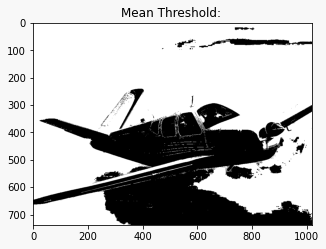

In [64]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage import io as sk_io, color as sk_col, morphology as sk_mm
from skimage.filters import threshold_mean


# Load the image from the source file
image = sk_io.imread(image_file)

# Convert to grayscale so we only have one channel
bw_image = sk_col.rgb2gray(image)

# Find the mean threshold value
mean_val = threshold_mean(bw_image)

# Threshold the image
binary_image = bw_image > mean_val

# Plot the thresholded image
fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(binary_image, cmap="gray")
plt.title("Mean Threshold: ")
plt.show()

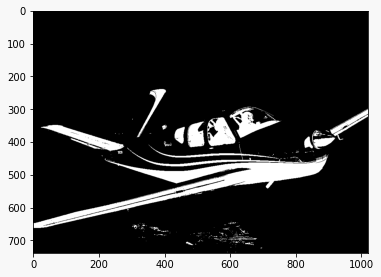

In [69]:
import numpy as np
from skimage import color as sk_col
from skimage.filters import threshold_otsu

image = sk_io.imread(image_file)

# Convert to grayscale so we only have one channel
bw_planes = sk_col.rgb2gray(image )
planes_otsu = threshold_otsu(bw_planes)
thresh_planes = bw_planes > planes_otsu

# Convert the thresholded image to its inverse
inverse_thresh = np.invert(thresh_planes)

fig = plt.figure(figsize=(6,6))
fig.patch.set_facecolor("#f8f8f8ff")
plt.imshow(inverse_thresh, "gray")
plt.show()